参考：
[Pandas速查手册中文版](https://zhuanlan.zhihu.com/p/25630700)&[Pandas Cheat Sheet](https://www.dataquest.io/blog/pandas-cheat-sheet/)&[Pandas主要命令中文帮助](https://zhuanlan.zhihu.com/p/27878128)

主要是熟悉pandas的基本操作和常用指令，并配合实例进行理解，顺便可以作为参考手册，需要用到的时候翻一下

In [3]:
import pandas as pd
import numpy as np

## Pandas的基本操作

In [12]:
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
     'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [22]:
df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])
df.append(df2)

,a,b
0,1,2
1,3,4
0,5,6
1,7,8


In [25]:
df.drop(index=1)

,a,b
0,1,2


In [26]:
#Create a Dictionary of series
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Minsu','Jack',
   'Lee','David','Gasper','Betina','Andres']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])}

#Create a DataFrame
df = pd.DataFrame(d)
df

,Name,Age,Rating
0,Tom,25,4.23
1,James,26,3.24
2,Ricky,25,3.98
3,Vin,23,2.56
4,Steve,30,3.20
5,Minsu,29,4.60
6,Jack,23,3.80
7,Lee,34,3.78
8,David,40,2.98
9,Gasper,30,4.80


In [29]:
# df.sum(axis=0),df.sum(axis=1),df.mean(),df.std()

由于DataFrame是异构数据结构。通用操作不适用于所有函数。
- 类似于：sum()，cumsum()函数能与数字和字符(或)字符串数据元素一起工作，不会产生任何错误。
- 字符聚合从来都比较少被使用，虽然这些函数不会引发任何异常。由于这样的操作无法执行，因此，当DataFrame包含字符或字符串数据时，像abs()，cumprod()这样的函数会抛出异常。

In [32]:
df.describe(include='all')
#describe 描述数据的统计属性，include='all','object','number'

,Name,Age,Rating
count,12,12.000000,12.000000
unique,12,NaN,NaN
top,Lee,NaN,NaN
freq,1,NaN,NaN
mean,NaN,31.833333,3.743333
std,NaN,9.232682,0.661628
min,NaN,23.000000,2.560000
25%,NaN,25.000000,3.230000
50%,NaN,29.500000,3.790000
75%,NaN,35.500000,4.132500


## Pandas的函数应用

要将自己或其他库的函数应用于Pandas对象，应该了解三种重要的方法。以下讨论了这些方法。 使用适当的方法取决于函数是否期望在整个DataFrame，行或列或元素上进行操作。
- 表格函数应用：pipe()
- 行或列函数应用：apply()
- 元素函数应用：applymap()

In [34]:
def adder(ele1,ele2):
    return ele1+ele2

df = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])
df.pipe(adder,2)
#可以将自定义的函数应用到整个表格之中

,col1,col2,col3
0,2.189084,-0.098079,2.770663
1,0.584509,2.486008,2.282472
2,2.932663,2.323761,2.797177
3,2.852394,0.763381,3.414666
4,1.134133,1.732448,2.065831


可以使用apply()方法沿DataFrame或Panel的轴应用任意函数，它与描述性统计方法一样，采用可选的轴参数。 默认情况下，操作按列执行，将每列列为数组。

In [37]:
df = pd.DataFrame(np.arange(12).reshape(4,3),columns=['col1','col2','col3'])
df

,col1,col2,col3
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [39]:
df.apply(np.mean,axis=1)#默认是列统计，可根据axis参数调整
# agg是将一个数列应用到函数上，得到一个标量的值

0     1.0
1     4.0
2     7.0
3    10.0
dtype: float64

并不是所有的函数都可以向量化(也不是返回另一个数组的NumPy数组，也不是任何值)，在DataFrame上的方法applymap()和类似地在Series上的map()接受任何Python函数，并且返回单个值。

In [40]:
df = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])
df.applymap(lambda x:x*100)
# applymap是对于Dataframe进行函数应用，map是对于series进行的函数应用

,col1,col2,col3
0,94.450182,-61.586479,53.245808
1,-67.388503,-161.092762,-219.372800
2,-36.506844,187.580261,-33.098543
3,-14.771032,125.145138,122.656545
4,169.246493,151.827994,-57.709338


## Pandas重建索引，将行列的索引重新排列

In [4]:
N=20

df = pd.DataFrame({
   'A': pd.date_range(start='2016-01-01',periods=N,freq='D'),
   'x': np.linspace(0,stop=N-1,num=N),
   'y': np.random.rand(N),
   'C': np.random.choice(['Low','Medium','High'],N).tolist(),#以p概率随机选取，默认均匀分布
   'D': np.random.normal(100, 10, size=(N)).tolist()#高斯概率密度函数
})
#reindex the DataFrame
df_reindexed = df.reindex(index=[0,2,5], columns=['A', 'C', 'B'])
df,df_reindexed
#df1.reindex_like：类似于np.zero_like,必须保证列名相同

(            A     x         y       C           D
 0  2016-01-01   0.0  0.832463     Low  105.659172
 1  2016-01-02   1.0  0.315195  Medium  101.035835
 2  2016-01-03   2.0  0.032072     Low  106.625647
 3  2016-01-04   3.0  0.903155    High   89.713276
 4  2016-01-05   4.0  0.173398  Medium  113.296172
 5  2016-01-06   5.0  0.194769     Low  107.574177
 6  2016-01-07   6.0  0.948961    High   91.841694
 7  2016-01-08   7.0  0.445378  Medium  103.176324
 8  2016-01-09   8.0  0.736564  Medium   95.292231
 9  2016-01-10   9.0  0.792323    High   99.863799
 10 2016-01-11  10.0  0.069471     Low   80.781429
 11 2016-01-12  11.0  0.031004    High   88.676586
 12 2016-01-13  12.0  0.987111    High   87.287817
 13 2016-01-14  13.0  0.035464     Low  114.496705
 14 2016-01-15  14.0  0.779112    High  105.895635
 15 2016-01-16  15.0  0.018923     Low  108.048943
 16 2016-01-17  16.0  0.204203  Medium  105.324602
 17 2016-01-18  17.0  0.746824    High  101.604758
 18 2016-01-19  18.0  0.471363 

填充时重新加注
reindex()采用可选参数方法，它是一个填充方法，其值如下：
- pad/ffill - 向前填充值
- bfill/backfill - 向后填充值
- nearest - 从最近的索引值填充

reindex的limit参数是限制填充的个数

rename()方法允许基于一些映射(字典或者系列)或任意函数来重新标记一个轴。

## Pandas迭代

Pandas对象之间的基本迭代的行为取决于类型。当迭代一个系列时，它被视为数组式，基本迭代产生这些值。
- Series - 值
- DataFrame - 列标签
- Pannel - 项目标签

#### 迭代DataFrame提供列名。现在来看看下面的例子来理解这个概念。

In [5]:
N=20

df = pd.DataFrame({
    'A': pd.date_range(start='2016-01-01',periods=N,freq='D'),
    'x': np.linspace(0,stop=N-1,num=N),
    'y': np.random.rand(N),
    'C': np.random.choice(['Low','Medium','High'],N).tolist(),
    'D': np.random.normal(100, 10, size=(N)).tolist()
    })
for col in df:
    print(col)

A
x
y
C
D


#### iteritems()示例将每个列作为键，将值与值作为键和列值迭代为Series对象。

In [6]:
df = pd.DataFrame(np.random.randn(4,3),columns=['col1','col2','col3'])
for key,value in df.iteritems():
    print(key,value)

col1 0    1.286646
1    0.568088
2    0.346077
3    1.268181
Name: col1, dtype: float64
col2 0    0.710972
1   -0.775645
2   -0.561335
3   -0.450156
Name: col2, dtype: float64
col3 0   -0.343181
1   -0.443229
2   -1.976857
3   -0.437796
Name: col3, dtype: float64


#### iterrows()示例iterrows()返回迭代器，产生每个索引值以及包含每行数据的序列

In [7]:
df = pd.DataFrame(np.random.randn(4,3),columns = ['col1','col2','col3'])
for row_index,row in df.iterrows():
    print(row_index,row)

0 col1    0.119206
col2    0.570485
col3   -1.907285
Name: 0, dtype: float64
1 col1   -0.092876
col2   -0.496099
col3   -1.030095
Name: 1, dtype: float64
2 col1    0.116608
col2   -0.631407
col3    0.341545
Name: 2, dtype: float64
3 col1    0.475924
col2   -0.719754
col3    0.345922
Name: 3, dtype: float64


#### itertuples()示例itertuples()方法将为DataFrame中的每一行返回一个产生一个命名元组的迭代器。元组的第一个元素将是行的相应索引值，而剩余的值是行值。

In [8]:
df = pd.DataFrame(np.random.randn(4,3),columns = ['col1','col2','col3'])
for row in df.itertuples():
    print(row)

Pandas(Index=0, col1=-1.1086744020678936, col2=-1.6276481593242509, col3=-1.552329644026358)
Pandas(Index=1, col1=-0.8126248047353696, col2=-0.7559999001996442, col3=1.832238377927342)
Pandas(Index=2, col1=-0.06545183431204521, col2=-0.32628146478907, col3=0.35468809035946264)
Pandas(Index=3, col1=-0.6110379475641126, col2=0.7490088980503385, col3=-1.0626819869509523)


## Pandas的排序

In [19]:
unsorted_df=pd.DataFrame(np.random.randn(10,2),index=[1,4,6,2,3,5,9,8,0,7],columns=['col2','col1'])
unsorted_df

,col2,col1
1,2.025412,1.446888
4,-1.048149,0.713610
6,1.631909,-1.042141
2,0.518820,-0.331244
3,0.813698,0.841932
5,-0.602787,-0.750458
9,-0.680949,-0.354757
8,-0.331373,-0.996331
0,-0.335798,0.491961
7,-0.649243,-1.449817


#### 使用sort_index()方法，通过传递axis参数和排序顺序，可以对DataFrame进行排序。 默认情况下，按照升序对行标签进行排序。

In [17]:
unsorted_df.sort_index(axis=0,ascending=True)
#ascending是正向排序和反向排序参数，默认是正向，还有axis参数

,col2,col1
0,-0.458025,0.081876
1,0.807982,0.215960
2,-0.465499,-0.205058
3,-0.091212,-1.510133
4,0.488452,0.289479
5,-0.747514,1.270808
6,-0.265601,0.314011
7,-0.284540,-0.199302
8,0.441870,0.274070
9,-0.532099,-0.071189


#### 按值排序像索引排序一样，sort_values()是按值排序的方法。它接受一个by参数，它将使用要与其排序值的DataFrame的列名称。

In [23]:
unsorted_df.sort_values(by='col1',kind='mergeesort')
#参数by选择需要排序的列，
#sort_values()提供了从mergeesort，heapsort和quicksort中选择算法的一个配置。Mergesort是唯一稳定的算法。

,col2,col1
7,-0.649243,-1.449817
6,1.631909,-1.042141
8,-0.331373,-0.996331
5,-0.602787,-0.750458
9,-0.680949,-0.354757
2,0.518820,-0.331244
0,-0.335798,0.491961
4,-1.048149,0.713610
3,0.813698,0.841932
1,2.025412,1.446888


## Pandas字符串和文本数据

- lower()	将Series/Index中的字符串转换为小写。
- upper()	将Series/Index中的字符串转换为大写。
- len()	计算字符串长度。
- strip()	帮助从两侧的系列/索引中的每个字符串中删除空格(包括换行符)。
- split(' ')	用给定的模式拆分每个字符串。
- cat(sep=' ')	使用给定的分隔符连接系列/索引元素。
- get_dummies()	返回具有单热编码值的数据帧(DataFrame)。
- contains(pattern)	如果元素中包含子字符串，则返回每个元素的布尔值True，否则为False。
- replace(a,b)	将值a替换为值b。
- repeat(value)	重复每个元素指定的次数。
- count(pattern) 返回模式中每个元素的出现总数。

## Pandas索引和选择数据

#### .loc() Pandas提供了各种方法来完成基于标签的索引。 切片时，也包括起始边界。整数是有效的标签，但它们是指标签而不是位置。

In [27]:
df = pd.DataFrame(np.random.randn(8, 4),
index = ['a','b','c','d','e','f','g','h'], columns = ['A', 'B', 'C', 'D'])
df.loc[:,'A'],df.loc[:,['A','B']],df.loc['a']>0,df.loc['a':'h']
#loc[rows,cols]通过选择行和列进行选取

(a   -0.471425
 b   -1.533610
 c    0.682249
 d    1.547998
 e   -0.605791
 f   -0.008891
 g    1.002635
 h    1.260819
 Name: A, dtype: float64,           A         B
 a -0.471425  1.445443
 b -1.533610  1.205573
 c  0.682249  0.756642
 d  1.547998  0.032138
 e -0.605791  0.324705
 f -0.008891  0.122346
 g  1.002635 -1.056946
 h  1.260819 -0.041203, A    False
 B     True
 C     True
 D     True
 Name: a, dtype: bool,           A         B         C         D
 a -0.471425  1.445443  1.001738  0.445310
 b -1.533610  1.205573 -0.415983 -0.734016
 c  0.682249  0.756642  0.255904  1.964030
 d  1.547998  0.032138 -0.643925  1.246637
 e -0.605791  0.324705 -1.163845  0.057659
 f -0.008891  0.122346  0.206365  1.009502
 g  1.002635 -1.056946  1.583509  0.540070
 h  1.260819 -0.041203  1.345449 -0.163728)

#### .iloc() Pandas提供了各种方法，以获得纯整数索引。像python和numpy一样，第一个位置是基于0的索引。

In [29]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])
df.iloc[:4],df.iloc[1:2,3:4],df.iloc[[1,3,5],[2,3]]

(          A         B         C         D
 0  1.097932 -0.383936  0.676113 -0.334136
 1 -0.055302  0.592609  1.410120  0.052804
 2  1.235874 -0.904603  0.846995 -0.051458
 3 -1.124598  0.134687 -0.730505 -0.184938,           D
 1  0.052804,           C         D
 1  1.410120  0.052804
 3 -0.730505 -0.184938
 5 -0.172718  2.271741)

#### .ix()  除了基于纯标签和整数之外，Pandas还提供了一种使用.ix()运算符进行选择和子集化对象的混合方法

In [31]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])
df.ix[:4],df.ix[:,'A']
#随着pandas版本的推进ix[]逐渐被舍弃了，尽量使用loc[]和iloc[]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


(          A         B         C         D
 0  0.557349  0.579477 -1.248075 -2.003327
 1 -0.332292 -1.095740 -1.355212  0.535016
 2  0.513063 -0.013905  0.949741 -0.052862
 3  0.460705  0.161199 -1.635887 -0.556353
 4  0.683219 -0.404658 -0.943479  1.394483, 0    0.557349
 1   -0.332292
 2    0.513063
 3    0.460705
 4    0.683219
 5   -1.128632
 6    0.931357
 7   -1.123260
 Name: A, dtype: float64)

#### 基于Dataframe的直接操作[]

In [37]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])
df.A,df['A'],df[0:2]

(0    0.256513
 1   -2.273562
 2    0.028589
 3   -1.909102
 4   -1.317572
 5   -0.542639
 6   -0.620966
 7   -1.134383
 Name: A, dtype: float64, 0    0.256513
 1   -2.273562
 2    0.028589
 3   -1.909102
 4   -1.317572
 5   -0.542639
 6   -0.620966
 7   -1.134383
 Name: A, dtype: float64,           A         B         C         D
 0  0.256513 -0.613134  2.182432 -0.372075
 1 -2.273562  1.352440  0.341235  0.209698)

## Pandas的统计函数

#### pct_change()函数：此函数将每个元素与其前一个元素进行比较，并计算变化百分比。

In [2]:
s = pd.Series([1,2,3,4,5,4])
s.pct_change()
#不难看出计算百分比的((i+1)-(i))/i

0         NaN
1    1.000000
2    0.500000
3    0.333333
4    0.250000
5   -0.200000
dtype: float64

#### 协方差适用于系列数据。Series对象有一个方法cov用来计算序列对象之间的协方差。NA将被自动排除。（协方差用来描述相似度）

In [3]:
s1 = pd.Series(np.random.randn(10))
s2 = pd.Series(np.random.randn(10))
s1.cov(s2)
# 当应用于DataFrame时，协方差方法计算所有列之间的协方差(cov)值。

-0.2541660479397834

#### 相关性（皮尔逊相关系数）

In [5]:
frame = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])
frame.corr()
# 热力图就是根据这个计算进行可视化的

,a,b,c,d,e
a,1.000000,0.159125,0.095646,0.493332,0.326354
b,0.159125,1.000000,-0.586400,0.258411,-0.010643
c,0.095646,-0.586400,1.000000,-0.429985,0.321852
d,0.493332,0.258411,-0.429985,1.000000,0.507350
e,0.326354,-0.010643,0.321852,0.507350,1.000000


#### 数据排名（数据排名为元素数组中的每个元素生成排名。在关系的情况下，分配平均等级。）

In [24]:
s = pd.Series(np.random.np.random.randn(5), index=list('abcde'))
s['d'] = s['b']
s,s.rank(method='min')
# Rank可选地使用一个默认为true的升序参数; 当错误时，数据被反向排序，也就是较大的值被分配较小的排序。
# Rank支持不同的tie-breaking方法，用方法参数指定
# - average 并列组平均排序等级
# - min 组中最低的排序等级
# - max 组中最高的排序等级
# - first 按照它们出现在数组中的顺序分配队列

(a   -0.195504
 b   -1.231376
 c    0.609065
 d   -1.231376
 e    0.366882
 dtype: float64, a    3.0
 b    1.0
 c    5.0
 d    1.0
 e    4.0
 dtype: float64)

#### 为了处理数字数据，Pandas提供了几个变体，如滚动，展开和指数移动窗口统计的权重。 其中包括总和，均值，中位数，方差，协方差，相关性等。

In [27]:
# .rolling()函数，使用window=3参数并在其上应用适当的统计函数
df = pd.DataFrame(np.random.randn(10, 4),
                  index=pd.date_range('1/1/2020', periods=10),
                  columns=['A', 'B', 'C', 'D'])
df.rolling(window=3).mean()
# 由于窗口大小为3(window)，前两个元素有空值，第三个元素的值将是n，
# n-1和n-2元素的平均值。这样也可以应用上面提到的各种函数了。

,A,B,C,D
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,0.763498,-0.407310,0.782751,0.304501
2020-01-04,1.342714,-0.397372,0.362209,0.404514
2020-01-05,1.261471,-1.078983,0.089721,-0.205356
2020-01-06,1.156957,-0.834069,-0.767670,0.194500
2020-01-07,0.289221,-0.819653,-0.827347,0.394512
2020-01-08,-0.327775,0.186179,-1.037372,0.733497
2020-01-09,-1.152848,0.910625,-0.775968,0.527723
2020-01-10,-0.498088,1.334449,-0.916210,-0.147702


In [29]:
#.expanding()函数
df = pd.DataFrame(np.random.randn(10,4),
                 index=pd.date_range('1/1/2020',periods=10),
                 columns=['A','B','C','D'])
df.expanding(min_periods=3).mean()
# 这个函数可以应用于一系列数据。
# 指定min_periods = n参数并在其上应用适当的统计函数。

,A,B,C,D
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.010764,0.179322,0.370241,0.432720
2020-01-04,-0.050338,0.150083,0.206658,0.197027
2020-01-05,-0.047608,0.102248,0.288942,0.033898
2020-01-06,-0.158037,0.138320,0.399634,-0.049451
2020-01-07,0.144655,0.153179,0.301571,0.024078
2020-01-08,0.070236,-0.052242,0.357593,0.049460
2020-01-09,-0.006136,-0.129557,0.172678,-0.163000
2020-01-10,0.021371,-0.070043,-0.123864,-0.137679


In [36]:
# .ewm()函数，ewm()可应用于系列数据。指定com，span，halflife参数，
# 并在其上应用适当的统计函数。它以指数形式分配权重。
df = pd.DataFrame(np.arange(40).reshape(10,4),
                 index=pd.date_range('1/1/2020',periods=10),
                 columns=['A','B','C','D'])
df,df.ewm(com=1).mean()

(             A   B   C   D
 2020-01-01   0   1   2   3
 2020-01-02   4   5   6   7
 2020-01-03   8   9  10  11
 2020-01-04  12  13  14  15
 2020-01-05  16  17  18  19
 2020-01-06  20  21  22  23
 2020-01-07  24  25  26  27
 2020-01-08  28  29  30  31
 2020-01-09  32  33  34  35
 2020-01-10  36  37  38  39,
                     A          B          C          D
 2020-01-01   0.000000   1.000000   2.000000   3.000000
 2020-01-02   2.666667   3.666667   4.666667   5.666667
 2020-01-03   5.714286   6.714286   7.714286   8.714286
 2020-01-04   9.066667  10.066667  11.066667  12.066667
 2020-01-05  12.645161  13.645161  14.645161  15.645161
 2020-01-06  16.380952  17.380952  18.380952  19.380952
 2020-01-07  20.220472  21.220472  22.220472  23.220472
 2020-01-08  24.125490  25.125490  26.125490  27.125490
 2020-01-09  28.070450  29.070450  30.070450  31.070450
 2020-01-10  32.039101  33.039101  34.039101  35.039101)

窗口函数主要用于通过平滑曲线来以图形方式查找数据内的趋势。如果日常数据中有很多变化，并且有很多数据点可用，那么采样和绘图就是一种方法，应用窗口计算并在结果上绘制图形是另一种方法。 通过这些方法，可以平滑曲线或趋势。
<br>emw()函数的参数解释：
<br>adjust参数是考虑历史数据的有限性，True代表历史数据有限，False代表历史数据默认无限性.
<br>ignore_na参数对于数据中的nan是否分配权重
<br>com，span，halflife参数不同的计算方法得到平滑指数a，也可以直接使用alpha制定a的值，具体计算方法见文档

## Pandas的聚合

#### 当有了滚动，扩展和ewm对象创建了以后，就有几种方法可以对数据执行聚合。

In [4]:
df = pd.DataFrame(np.arange(16).reshape(4, 4), 
                  index=pd.date_range('1/1/2020', periods=4), 
                  columns=list('ABCD'))
df

,A,B,C,D
2020-01-01,0,1,2,3
2020-01-02,4,5,6,7
2020-01-03,8,9,10,11
2020-01-04,12,13,14,15


In [17]:
#创建对象之后，使用agg对数据执行聚合，包括，单列，多列和Dataframe
df.rolling(window=2, min_periods=1), r.agg(np.sum), r[['A', 'B']].agg(
    [np.sum, np.mean]), r.agg({'A': np.sum, 'B': np.mean})

(Rolling [window=2,min_periods=1,center=False,axis=0],
                A     B     C     D
 2020-01-01   0.0   1.0   2.0   3.0
 2020-01-02   4.0   6.0   8.0  10.0
 2020-01-03  12.0  15.0  18.0  21.0
 2020-01-04  24.0  27.0  30.0  33.0,
                A          B     
              sum mean   sum mean
 2020-01-01   0.0  0.0   1.0  1.0
 2020-01-02   4.0  2.0   6.0  3.0
 2020-01-03  12.0  4.0  15.0  5.0
 2020-01-04  24.0  8.0  27.0  9.0,
                A    B
 2020-01-01   0.0  1.0
 2020-01-02   4.0  3.0
 2020-01-03  12.0  5.0
 2020-01-04  24.0  9.0)

## Pandas处理缺失值（NA或NaN）

In [24]:
df = pd.DataFrame(np.arange(15).reshape(
    5, 3), index=list('acefh'), columns=list('123'))
df = df.reindex(index=list('abcdefgh'))
df
#使用reindex产生nan值

,1,2,3
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,NaN,NaN,NaN
e,6.0,7.0,8.0
f,9.0,10.0,11.0
g,NaN,NaN,NaN
h,12.0,13.0,14.0


#### 使用isnull()和notnull()检查缺失值

In [26]:
df['1'].isnull(),df['1'].notnull()
#数据计算时，nan值被视为0

(a    False
 b     True
 c    False
 d     True
 e    False
 f    False
 g     True
 h    False
 Name: 1, dtype: bool, a     True
 b    False
 c     True
 d    False
 e     True
 f     True
 g    False
 h     True
 Name: 1, dtype: bool)

#### 清理/填充缺少数据

In [29]:
#清理缺失值和替换缺失值
df['1'].dropna(),df['2'].fillna(0)
#replace也可以作为替换的方法，不过要指定替换

(a     0.0
 c     3.0
 e     6.0
 f     9.0
 h    12.0
 Name: 1, dtype: float64, a     1.0
 b     0.0
 c     4.0
 d     0.0
 e     7.0
 f    10.0
 g     0.0
 h    13.0
 Name: 2, dtype: float64)

## Pandas分组（groupby）

#### 任何分组(groupby)操作都涉及原始对象的以下操作之一。
- 分割对象
- 应用一个函数
- 结合的结果
<br>在许多情况下，我们将数据分成多个集合，并在每个子集上应用一些函数。在应用函数中，可以执行以下操作 
- 聚合 计算汇总统计
- 转换 执行一些特定于组的操作
- 过滤 在某些情况下丢弃数据

In [32]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
                     'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
            'Rank': [1, 2, 2, 3, 3, 4, 1, 1, 2, 4, 1, 2],
            'Year': [2014, 2015, 2014, 2015, 2014, 2015, 2016, 2017, 2016, 2014, 2015, 2017],
            'Points': [876, 789, 863, 673, 741, 812, 756, 788, 694, 701, 804, 690]}
df = pd.DataFrame(ipl_data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


#### 将数据拆分成组
Pandas对象可以分成任何对象。有多种方式来拆分对象，如 
- obj.groupby(‘key’)
- obj.groupby([‘key1’,’key2’])
- obj.groupby(key,axis=1)

In [35]:
# 单列分组
df.groupby('Team').groups

{'Devils': Int64Index([2, 3], dtype='int64'),
 'Kings': Int64Index([4, 6, 7], dtype='int64'),
 'Riders': Int64Index([0, 1, 8, 11], dtype='int64'),
 'Royals': Int64Index([9, 10], dtype='int64'),
 'kings': Int64Index([5], dtype='int64')}

In [37]:
# 多列分组
df.groupby(['Team', 'Year']).groups

{('Devils', 2014): Int64Index([2], dtype='int64'),
 ('Devils', 2015): Int64Index([3], dtype='int64'),
 ('Kings', 2014): Int64Index([4], dtype='int64'),
 ('Kings', 2016): Int64Index([6], dtype='int64'),
 ('Kings', 2017): Int64Index([7], dtype='int64'),
 ('Riders', 2014): Int64Index([0], dtype='int64'),
 ('Riders', 2015): Int64Index([1], dtype='int64'),
 ('Riders', 2016): Int64Index([8], dtype='int64'),
 ('Riders', 2017): Int64Index([11], dtype='int64'),
 ('Royals', 2014): Int64Index([9], dtype='int64'),
 ('Royals', 2015): Int64Index([10], dtype='int64'),
 ('kings', 2015): Int64Index([5], dtype='int64')}

In [40]:
# 迭代遍历分组,默认情况下，groupby对象具有与分组名相同的标签名称
grouped = df.groupby('Year')
for name, group in grouped:
    print(name)
    print(group)
#不遍历分组，选择某一个分组
grouped.get_group(2014)

2014
     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701
2015
      Team  Rank  Year  Points
1   Riders     2  2015     789
3   Devils     3  2015     673
5    kings     4  2015     812
10  Royals     1  2015     804
2016
     Team  Rank  Year  Points
6   Kings     1  2016     756
8  Riders     2  2016     694
2017
      Team  Rank  Year  Points
7    Kings     1  2017     788
11  Riders     2  2017     690


,Team,Rank,Year,Points
0,Riders,1,2014,876
2,Devils,2,2014,863
4,Kings,3,2014,741
9,Royals,4,2014,701


#### 聚合
聚合函数为每个组返回单个聚合值。当创建了分组(group by)对象，就可以对分组数据执行多个聚合操作。

In [43]:
#与普通聚合类似，可以使用多个聚合函数
grouped['Points'].agg(np.mean),grouped.agg(np.size)

(Year
 2014    795.25
 2015    769.50
 2016    725.00
 2017    739.00
 Name: Points, dtype: float64,       Team  Rank  Points
 Year                    
 2014     4     4       4
 2015     4     4       4
 2016     2     2       2
 2017     2     2       2)

#### 转换
分组或列上的转换返回索引大小与被分组的索引相同的对象。因此，转换应该返回与组块大小相同的结果。

In [47]:
grouped = df.groupby('Team')
score = lambda x: x.std(ddof=1)
grouped.transform(score)

,Rank,Year,Points
0,0.500000,1.290994,88.567771
1,0.500000,1.290994,88.567771
2,0.707107,0.707107,134.350288
3,0.707107,0.707107,134.350288
4,1.154701,1.527525,24.006943
5,NaN,NaN,NaN
6,1.154701,1.527525,24.006943
7,1.154701,1.527525,24.006943
8,0.500000,1.290994,88.567771
9,2.121320,0.707107,72.831998


#### 过滤根据定义的标准过滤数据并返回数据的子集。filter()函数用于过滤数据。

In [48]:
df_filter = df.groupby('Team').filter(lambda x: len(x) >= 3)

In [49]:
df_filter

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


## Pandas合并/连接

#### pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,left_index=False, right_index=False, sort=True)

在这里，有以下几个参数可以使用：
- left 一个DataFrame对象。
- right 另一个DataFrame对象。
- on 列(名称)连接，必须在左和右DataFrame对象中存在(找到)。
- left_on 左侧DataFrame中的列用作键，可以是列名或长度等于DataFrame长度的数组。
- right_on 来自右的DataFrame的列作为键，可以是列名或长度等于DataFrame长度的数组。
- left_index 如果为True，则使用左侧DataFrame中的索引(行标签)作为其连接键。 在具有MultiIndex(分层)的DataFrame的情况下，级别的数量必须与来自右DataFrame的连接键的数量相匹配。
- right_index 与右DataFrame的left_index具有相同的用法。
- how 它是left, right, outer以及inner之中的一个，默认为内inner。
- sort 按照字典顺序通过连接键对结果DataFrame进行排序。默认为True，设置为False时，在很多情况下大大提高性能。

In [53]:
left = pd.DataFrame({'id': [1, 2, 3, 4, 5],
                     'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
                     'subject_id': ['sub1', 'sub2', 'sub4', 'sub6', 'sub5']})
right = pd.DataFrame({'id': [1, 2, 3, 4, 5],
                      'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
                      'subject_id': ['sub2', 'sub4', 'sub3', 'sub6', 'sub5']})
left,right

(   id    Name subject_id
 0   1    Alex       sub1
 1   2     Amy       sub2
 2   3   Allen       sub4
 3   4   Alice       sub6
 4   5  Ayoung       sub5,    id   Name subject_id
 0   1  Billy       sub2
 1   2  Brian       sub4
 2   3   Bran       sub3
 3   4  Bryce       sub6
 4   5  Betty       sub5)

In [63]:
#在一个键上合并两个数据帧
one_by_two = pd.merge(left=left,right=right,on='id')
#多个键合并多个数据帧
two_by_two = pd.merge(left=left,right=right,on=['id','subject_id'])
#同一columns的多列会转化为col1_x,col2_y等列
#类似于sql的多个键和多个数据库的合并和连接
left_join = pd.merge(left=left,right=right,on='subject_id',how='left')
right_join = pd.merge(left=left,right=right,on='subject_id',how='right')
outer_join = pd.merge(left=left,right=right,on='subject_id',how='outer')
inner_join = pd.merge(left=left,right=right,on='subject_id',how='inner')
pd.DataFrame(np.vstack((left_join,right_join,outer_join,inner_join)))

,0,1,2,3,4
0,1,Alex,sub1,NaN,NaN
1,2,Amy,sub2,1,Billy
2,3,Allen,sub4,2,Brian
3,4,Alice,sub6,4,Bryce
4,5,Ayoung,sub5,5,Betty
5,2,Amy,sub2,1,Billy
6,3,Allen,sub4,2,Brian
7,4,Alice,sub6,4,Bryce
8,5,Ayoung,sub5,5,Betty
9,NaN,NaN,sub3,3,Bran


## Pandas级联&时间戳处理

#### pd.concat(objs,axis=0,join='outer',join_axes=None,ignore_index=False)

- objs - 这是Series，DataFrame或Panel对象的序列或映射。
- axis - {0，1，...}，默认为0，这是连接的轴。
- join - {'inner', 'outer'}，默认inner。如何处理其他轴上的索引。联合的外部和交叉的内部。
- ignore_index − 布尔值，默认为False。如果指定为True，则不要使用连接轴上的索引值。结果轴将被标记为：0，...，n-1。
- join_axes - 这是Index对象的列表。用于其他(n-1)轴的特定索引，而不是执行内部/外部集逻辑。

#### 连接对象，concat()函数完成了延轴执行级联才做的所有重要工作。

In [65]:
one = pd.DataFrame({'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
                    'subject_id': ['sub1', 'sub2', 'sub4', 'sub6', 'sub5'],
                    'Marks_scored': [98, 90, 87, 69, 78]},
                   index=[1, 2, 3, 4, 5])
two = pd.DataFrame({'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
                    'subject_id': ['sub2', 'sub4', 'sub3', 'sub6', 'sub5'],
                    'Marks_scored': [89, 80, 79, 97, 88]},
                   index=[1, 2, 3, 4, 5])
pd.concat([one, two])

,Name,subject_id,Marks_scored
1,Alex,sub1,98
2,Amy,sub2,90
3,Allen,sub4,87
4,Alice,sub6,69
5,Ayoung,sub5,78
1,Billy,sub2,89
2,Brian,sub4,80
3,Bran,sub3,79
4,Bryce,sub6,97
5,Betty,sub5,88


#### 使用附加连接append()

In [67]:
# 连接的一个有用的快捷方式是在Series和DataFrame实例的append方法。
# 这些方法实际上早于concat()方法。 它们沿axis=0连接，
one.append([two,one,two])

,Name,subject_id,Marks_scored
1,Alex,sub1,98
2,Amy,sub2,90
3,Allen,sub4,87
4,Alice,sub6,69
5,Ayoung,sub5,78
1,Billy,sub2,89
2,Brian,sub4,80
3,Bran,sub3,79
4,Bryce,sub6,97
5,Betty,sub5,88


#### 时间序列

In [68]:
# 主要有两种转换，生成时间序列和将时间序列和转换为不同的频率
# datatime.now()用于获取当前的日期和时间
pd.datetime.now()

datetime.datetime(2019, 1, 4, 14, 31, 20, 979052)

In [71]:
# 时间戳数据是时间序列数据的最基本类型，
# 他将数值与时间点相关联。
pd.Timestamp('2018-11-01'),pd.Timestamp(1523543524,unit='s')

(Timestamp('2018-11-01 00:00:00'), Timestamp('2018-04-12 14:32:04'))

In [72]:
# 创建一个时间范围
pd.date_range('12:00','23:59',freq='30min').time

array([datetime.time(12, 0), datetime.time(12, 30), datetime.time(13, 0),
       datetime.time(13, 30), datetime.time(14, 0), datetime.time(14, 30),
       datetime.time(15, 0), datetime.time(15, 30), datetime.time(16, 0),
       datetime.time(16, 30), datetime.time(17, 0), datetime.time(17, 30),
       datetime.time(18, 0), datetime.time(18, 30), datetime.time(19, 0),
       datetime.time(19, 30), datetime.time(20, 0), datetime.time(20, 30),
       datetime.time(21, 0), datetime.time(21, 30), datetime.time(22, 0),
       datetime.time(22, 30), datetime.time(23, 0), datetime.time(23, 30)],
      dtype=object)

## Pandas的分类数据

#### 什么是分类数据？

通常实时的数据包括重复的文本列。例如：性别，国家和代码等特征总是重复的。这些是分类数据的例子。分类变量只能采用有限的数量，而且通常是固定的数量。除了固定长度，分类数据可能有顺序，但不能执行数字操作。 分类是Pandas数据类型。
<br>分类数据类型在以下情况下非常有用 
- 一个字符串变量，只包含几个不同的值。将这样的字符串变量转换为分类变量将会节省一些内存。
- 变量的词汇顺序与逻辑顺序("one"，"two"，"three")不同。 通过转换为分类并指定类别上的顺序，排序和最小/最大将使用逻辑顺序，而不是词法顺序。
- 作为其他python库的一个信号，这个列应该被当作一个分类变量(例如，使用合适的统计方法或plot类型)。

#### 对象的创建

In [4]:
# 类别/分类
# 通过在pandas对象创建中将dtype指定为“category”。
s = pd.Series(["a","b","c","a"], dtype="category")
s
# 传递给系列对象的元素数量是四个，但类别只有三个，观察相同的输出类别

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]

In [7]:
# 使用标准Pandas分类构造函数，我们可以创建一个类别对象。
# pandas.Categorical(values, categories, ordered)
cat_1 = pd.Categorical(['a', 'b', 'c', 'a', 'b', 'c'])
cat_2 = cat = pd.Categorical(
    ['a', 'b', 'c', 'a', 'b', 'c', 'd'], ['c', 'b', 'a'])
# 第二个参数表示类别，因此，在类别中不存在的任何值将被视为NaN
cat_3 = pd.Categorical(['a', 'b', 'c', 'a', 'b', 'c', 'd'], [
                       'c', 'b', 'a'], ordered=True)
# 按照分类逻辑进行排序
cat_1, cat_2, cat_3

([a, b, c, a, b, c]
 Categories (3, object): [a, b, c], [a, b, c, a, b, c, NaN]
 Categories (3, object): [c, b, a], [a, b, c, a, b, c, NaN]
 Categories (3, object): [c < b < a])

#### 描述：.describe()函数，获取类别的属性：obj.cat.categories

In [9]:
# describe()
cat = pd.Categorical(["a", "c", "c", np.nan], categories=["b", "a", "c"])
df = pd.DataFrame({"cat": cat, "s": ["a", "c", "c", np.nan]})
df,df.describe(),df['cat'].describe()

(   cat    s
 0    a    a
 1    c    c
 2    c    c
 3  NaN  NaN,        cat  s
 count    3  3
 unique   2  2
 top      c  c
 freq     2  2, count     3
 unique    2
 top       c
 freq      2
 Name: cat, dtype: object)

In [17]:
# obj.cat.categories：命令用于获取对象的类别
s = pd.Categorical(['a','b','c',np.nan],categories=['a','b','c'])
# obj.ordered命令用于获取对象的顺序
s1 = pd.Series(["a","b","c","a"], dtype="category")
s2 = s1.cat.add_categories([4])
# categorical.add.categories()方法，可以追加新的类别
s3 = s1.cat.remove_categories('a')
# 使用cat.remove_categoried()方法，可以移除类别
s.categories,s.ordered,s2.cat.categories,s3
# 当ordered=True时，可以使用==和！=等比较运算符进行比较

(Index(['a', 'b', 'c'], dtype='object'),
 False,
 Index(['a', 'b', 'c', 4], dtype='object'),
 0    NaN
 1      b
 2      c
 3    NaN
 dtype: category
 Categories (2, object): [b, c])

## Pandas可视化

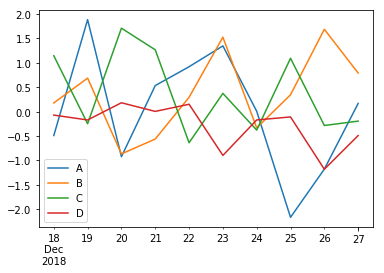

In [19]:
df = pd.DataFrame(np.random.randn(10,4),index=pd.date_range('2018/12/18',
   periods=10), columns=list('ABCD'))
df.plot()

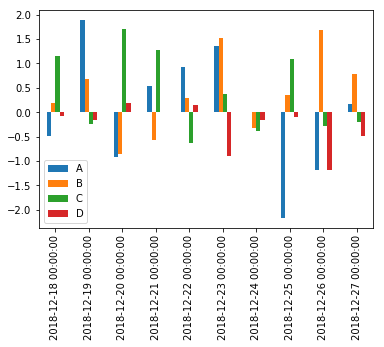

In [20]:
df.plot.bar()

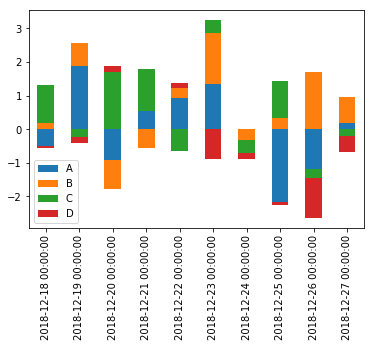

In [22]:
df.plot.bar(stacked=True)

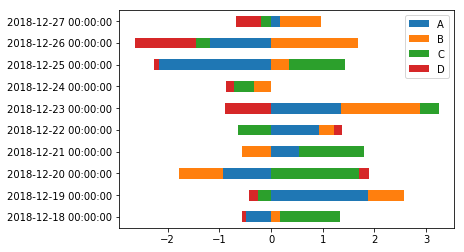

In [23]:
df.plot.barh(stacked=True)

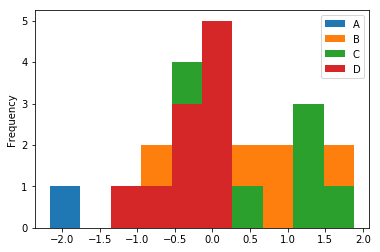

In [24]:
df.plot.hist()

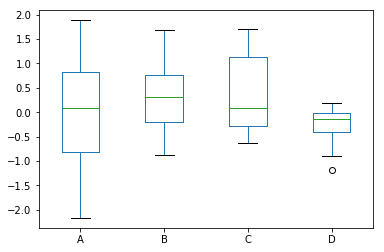

In [25]:
df.plot.box()

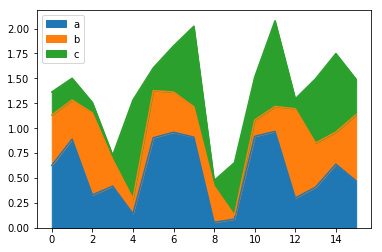

In [33]:
df = pd.DataFrame(np.random.rand(16,3),columns=list('abc'))
df.plot.area()

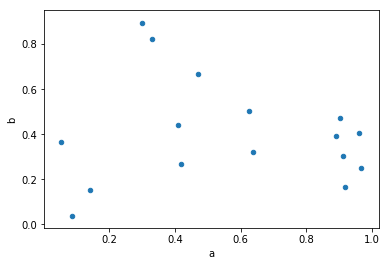

In [34]:
df.plot.scatter(x='a',y='b')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000232776CF7B8>,
      dtype=object)

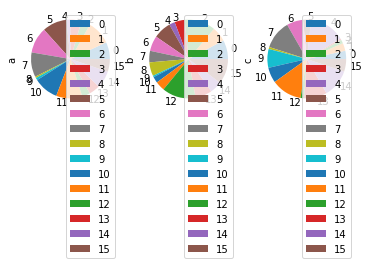

In [35]:
df.plot.pie(subplots=True)